<a href="https://colab.research.google.com/github/younghoonNa/PyTorch/blob/main/Pytorch/Pytorch_MNIST_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torchvision.datasets as dsets
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import random

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(42)
torch.manual_seed(42)
if device == 'cuda':
    torch.cuda.manual_seed_all(42)


## MNIST data load
- 원래 이미지 데이터 -> Img [ [0-255] , [Height], [Weight], [Channal] ] 
- Pytorch의 이미지 데이터 -> Img [ [0-1] , [Channal], [Height] , [Weight] ] 
- 따라서 `transforms.ToTensor()` 를 이용해 파이토치에 알맞게 변환 해줘야 함.
  -  `transforms.ToTensor()` 의 역할이 바로 이것.

### DataLoader
- DataLoader $\rightarrow$ 불러올 data
- batch_size $\rightarrow$ 작게 조개서 학습 시킬건데 크기는 얼마?. (주로 2의 지수)
- drop_last = True $\rightarrow$ batch_size 대로 잘랐는데 뒤에가 남을 경우에는 버릴까? 말까? True - 버리다, false - 사용한다.

In [ ]:
mnist_train = dsets.MNIST(root = './', train =True, transform = transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root = './', train= False, transform = transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
# parameters
training_epochs = 15
batch_size = 100

In [ ]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

## softmax Classifier

In [ ]:
# input layer는 784 (28*28), output layer = 10 why 0~9까지 
linear = nn.Linear(784, 10, bias = True).to(device)

criterion = nn.CrossEntropyLoss().to(device) #softmax의 cost 설정.
optimizer = optim.SGD(linear.parameters(), lr = 0.1)

In [ ]:
for epoch in range (training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)
  for X, Y in data_loader:
    X = X.view(-1, 28*28).to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = linear(X) # 분류 결괴 H(x) = linear(X)
    cost = criterion(hypothesis, Y) # 오차
    cost.backward() # 오차 확인 후 개선
    optimizer.step()
    
    avg_cost += cost/total_batch

  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.318961412
Epoch: 0002 cost = 0.308805287
Epoch: 0003 cost = 0.301614732
Epoch: 0004 cost = 0.295865536
Epoch: 0005 cost = 0.291642249
Epoch: 0006 cost = 0.288133651
Epoch: 0007 cost = 0.285138458
Epoch: 0008 cost = 0.282261282
Epoch: 0009 cost = 0.280172586
Epoch: 0010 cost = 0.278071880
Epoch: 0011 cost = 0.276464194
Epoch: 0012 cost = 0.274682432
Epoch: 0013 cost = 0.273281455
Epoch: 0014 cost = 0.271992981
Epoch: 0015 cost = 0.270681381
Learning finished


Accuracy: 0.8895999789237976
Label:  2
Prediction:  3


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


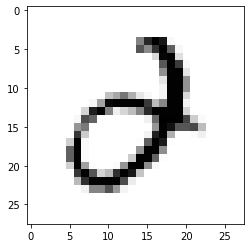

In [ ]:
#gradient 계산하지 않음.
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

